In [1]:
import numpy as np
import struct as st


In [2]:
import math
import matplotlib.pyplot as plt

In [3]:
trainingfilenames = {'images' : 'train-images.idx3-ubyte' ,'labels' : 'train-labels.idx1-ubyte'}
testfilenames = {'images' : 't10k-images.idx3-ubyte' ,'labels' : 't10k-labels.idx1-ubyte'}

data_types = {
        0x08: ('ubyte', 'B', 1),
        0x09: ('byte', 'b', 1),
        0x0B: ('>i2', 'h', 2),
        0x0C: ('>i4', 'i', 4),
        0x0D: ('>f4', 'f', 4),
        0x0E: ('>f8', 'd', 8)}


In [4]:
#..........................................................For training dataset..............................................................
print("Training Dataset.......")

for name in trainingfilenames.keys():
	if name == 'images':
		train_imagesfile = open(trainingfilenames[name],'rb')
	if name == 'labels':
		train_labelsfile = open(trainingfilenames[name],'rb')#,encoding='latin-1')

train_imagesfile.seek(0)
magic = st.unpack('>4B',train_imagesfile.read(4))
if(magic[0] and magic[1])or(magic[2] not in data_types):
	raise ValueError("File Format not correct")

#Information
nDim = magic[3]
print("Data is "+str(nDim)+"-D")
dataType = data_types[magic[2]][0]
print("Data Type :: ",dataType)
dataFormat = data_types[magic[2]][1]
print("Data Format :: ",dataFormat)
dataSize = data_types[magic[2]][2]
print("Data Size :: "+str(dataSize)+" byte\n")


#offset = 0004 for number of images
#offset = 0008 for number of rows
#offset = 0012 for number of columns
#32-bit integer (32 bits = 4 bytes)
train_imagesfile.seek(4)
nImg = st.unpack('>I',train_imagesfile.read(4))[0] #num of images/labels
nR = st.unpack('>I',train_imagesfile.read(4))[0] #num of rows
nC = st.unpack('>I',train_imagesfile.read(4))[0] #num of columns

train_labelsfile.seek(8) #Since no. of items = no. of images and is already read
print("no. of images :: ",nImg)
print("no. of rows :: ",nR)
print("no. of columns :: ",nC)
print
#Training set
#Reading the labels
train_labels_array = np.asarray(st.unpack('>'+dataFormat*nImg,train_labelsfile.read(nImg*dataSize))).reshape((nImg,1))
#Reading the Image data
nBatch = 10000
nIter = int(math.ceil(nImg/nBatch))
nBytes = nBatch*nR*nC*dataSize
nBytesTot = nImg*nR*nC*dataSize
train_images_array = np.array([])
for i in range(0,nIter):
	#try:
	temp_images_array = np.asarray(st.unpack('>'+dataFormat*nBytes,train_imagesfile.read(nBytes))).reshape((nBatch,nR,nC))
	'''except:
		nbytes = nBytesTot - (nIter-1)*nBytes
		temp_images_array = 255 - np.asarray(st.unpack('>'+'B'*nbytes,train_imagesfile.read(nbytes))).reshape((nBatch,nR,nC))'''
	#Stacking each nBatch block to form a larger block
	if train_images_array.size == 0:
		train_images_array = temp_images_array
	else:
		train_images_array = np.vstack((train_images_array,temp_images_array))
	temp_images_array = np.array([])

print("Training Set Labels shape ::",train_labels_array.shape)
print("Training Set Image shape ::",train_images_array.shape)


Training Dataset.......
Data is 3-D
Data Type ::  ubyte
Data Format ::  B
Data Size :: 1 byte

no. of images ::  60000
no. of rows ::  28
no. of columns ::  28
Training Set Labels shape :: (60000, 1)
Training Set Image shape :: (60000, 28, 28)


In [5]:
#..........................................................For test dataset..................................................................
print("Test Dataset.......")

for name in testfilenames.keys():
	if name == 'images':
		test_imagesfile = open(testfilenames[name],'rb')
	if name == 'labels':
		test_labelsfile = open(testfilenames[name],'rb')
        
test_imagesfile.seek(0)
magic = st.unpack('>4B',test_imagesfile.read(4))
if(magic[0] and magic[1])or(magic[2] not in data_types):
	raise ValueError("File Format not correct")

nDim = magic[3]
print("Data is ",nDim,"-D")
print
#offset = 0004 for number of images
#offset = 0008 for number of rows
#offset = 0012 for number of columns
#32-bit integer (32 bits = 4 bytes)
test_imagesfile.seek(4)
nImg = st.unpack('>I',test_imagesfile.read(4))[0] #num of images/labels
nR = st.unpack('>I',test_imagesfile.read(4))[0] #num of rows
nC = st.unpack('>I',test_imagesfile.read(4))[0] #num of columns

test_labelsfile.seek(8) #Since no. of items = no. of images and is already read
print("no. of images :: ",nImg)
print("no. of rows :: ",nR)
print("no. of columns :: ",nC)
print("\n")
#Test set
#Reading the labels
test_labels_array = np.asarray(st.unpack('>'+dataFormat*nImg,test_labelsfile.read(nImg*dataSize))).reshape((nImg,1))
#Reading the Image data
nBatch = 10000
nIter = int(math.ceil(nImg/nBatch))
nBytes = nBatch*nR*nC*dataSize
nBytesTot = nImg*nR*nC*dataSize
test_images_array = np.array([])
for i in range(0,nIter):
	#try:
	temp_images_array = np.asarray(st.unpack('>'+dataFormat*nBytes,test_imagesfile.read(nBytes))).reshape((nBatch,nR,nC))
	'''except:
		nbytes = nBytesTot - (nIter-1)*nBytes
		temp_images_array = 255 - np.asarray(st.unpack('>'+'B'*nbytes,test_imagesfile.read(nbytes))).reshape((nBatch,nR,nC))'''
	#Stacking each nBatch block to form a larger block
	if test_images_array.size == 0:
		test_images_array = temp_images_array
	else:
		test_images_array = np.vstack((test_images_array,temp_images_array))
	temp_images_array = np.array([])

print("Test Set Labels shape ::",test_labels_array.shape)
print("Test Set Image shape ::",test_images_array.shape)

Test Dataset.......
Data is  3 -D
no. of images ::  10000
no. of rows ::  28
no. of columns ::  28


Test Set Labels shape :: (10000, 1)
Test Set Image shape :: (10000, 28, 28)


In [6]:
print(train_images_array[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

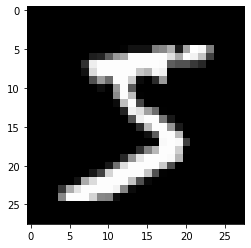

In [7]:
plt.imshow(train_images_array[0],cmap='gray')

In [8]:
print(train_labels_array[0])
print(len(train_labels_array))

[5]
60000


In [9]:
#Classifier to distinguish digits 1 and 2
c=0
for i in range(0,59999):
    if (train_labels_array[i]==1) or (train_labels_array[i]==0) :
        c=c+1
print(c)
        

12665


In [10]:
x_train =np.ndarray(shape=(c,784),dtype='int32')
y_train = np.ndarray(shape=(c),dtype='int32')
j=0
for i in range(0,59999):
    if ((train_labels_array[i]==1) or (train_labels_array[i]==0)) and j<c:
        x_train[j]=train_images_array[i].flatten()
        y_train[j]=train_labels_array[i]
        j=j+1


In [11]:
print(y_train)

[0 1 1 ... 1 0 1]


In [12]:
print(x_train[2])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 145 255
 211  31   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  32 237 253 252  71   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  11
 175 253 252  71   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 144 253 252  71   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  16 191 253 252  71   0   0   0   0   0   0   

In [13]:
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(x_train, y_train)

GaussianNB()

In [14]:
c=0
for i in range(0,9999):
    if (test_labels_array[i]==1) or (test_labels_array[i]==0) :
        c=c+1
print(c)
        

2115


In [15]:
x_test =np.ndarray(shape=(c,784),dtype='int32')
y_test = np.ndarray(shape=(c),dtype='int32')
j=0
for i in range(0,9999):
    if ((test_labels_array[i]==1) or (test_labels_array[i]==0)) and j<c:
        x_test[j]=test_images_array[i].flatten()
        y_test[j]=test_labels_array[i]
        j=j+1

In [16]:
predicted = GNB_classifier.predict(x_test)
print(predicted)

[1 0 1 ... 1 0 1]


In [17]:
from sklearn import metrics


Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.98      0.99      1135

    accuracy                           0.99      2115
   macro avg       0.99      0.99      0.99      2115
weighted avg       0.99      0.99      0.99      2115



Confusion matrix:
[[ 976    4]
 [  22 1113]]

Accuracy of the Algorithm:  0.9877068557919622


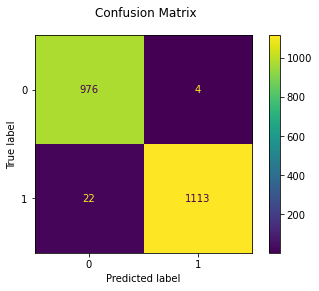

In [18]:
print("\nClassification report for classifier %s:\n%s\n" % (GNB_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(GNB_classifier, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", GNB_classifier.score(x_test, y_test))
plt.show()

In [19]:
from sklearn.metrics import roc_curve, auc ,roc_auc_score
from sklearn.preprocessing import label_binarize

In [21]:
y_pred_binarise = label_binarize(predicted, classes=[0,1])
y_test_binarise = label_binarize(y_test, classes=[0,1])
roc_auc = roc_auc_score(y_test_binarise, y_pred_binarise)
print(roc_auc)
fpr, tpr, thresh1 = roc_curve(y_test_binarise, y_pred_binarise)

0.9882675537175223


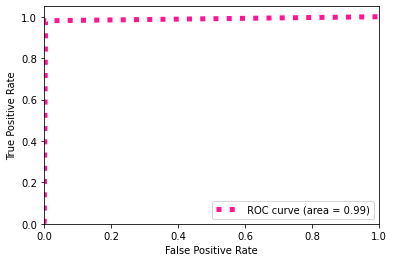

In [22]:
plt.figure()
plt.plot(fpr, tpr,label=' ROC curve (area = {0:0.2f})'
               ''.format(roc_auc),color='deeppink', linestyle=':', linewidth=5 )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()

In [23]:
#Classifier to distinguish digits 3 and 8
c=0
for i in range(0,59999):
    if (train_labels_array[i]==3) or (train_labels_array[i]==8) :
        c=c+1
print(c)
        

11981


In [24]:
x_train =np.ndarray(shape=(c,784),dtype='int32')
y_train = np.ndarray(shape=(c),dtype='int32')
j=0
for i in range(0,59999):
    if ((train_labels_array[i]==3) or (train_labels_array[i]==8)) and j<c:
        x_train[j]=train_images_array[i].flatten()
        y_train[j]=train_labels_array[i]
        j=j+1


In [25]:
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(x_train, y_train)

GaussianNB()

In [26]:
c=0
for i in range(0,9999):
    if (test_labels_array[i]==3) or (test_labels_array[i]==8) :
        c=c+1
print(c)

1984


In [27]:
x_test =np.ndarray(shape=(c,784),dtype='int32')
y_test = np.ndarray(shape=(c),dtype='int32')
j=0
for i in range(0,9999):
    if ((test_labels_array[i]==3) or (test_labels_array[i]==8)) and j<c:
        x_test[j]=test_images_array[i].flatten()
        y_test[j]=test_labels_array[i]
        j=j+1

In [28]:
print(y_train)

[3 3 3 ... 8 8 3]


In [29]:
predicted = GNB_classifier.predict(x_test)


Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           3       0.95      0.43      0.59      1010
           8       0.62      0.98      0.76       974

    accuracy                           0.70      1984
   macro avg       0.79      0.70      0.68      1984
weighted avg       0.79      0.70      0.68      1984



Confusion matrix:
[[435 575]
 [ 22 952]]

Accuracy of the Algorithm:  0.6990927419354839


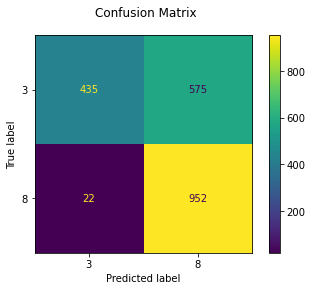

In [30]:
print("\nClassification report for classifier %s:\n%s\n" % (GNB_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(GNB_classifier, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", GNB_classifier.score(x_test, y_test))
plt.show()

In [31]:
y_pred_binarise = label_binarize(predicted, classes=[3,8])
y_test_binarise = label_binarize(y_test, classes=[3,8])
roc_auc = roc_auc_score(y_test_binarise, y_pred_binarise)
print(roc_auc)
fpr, tpr, thresh1 = roc_curve(y_test_binarise, y_pred_binarise)

0.7040529001565454


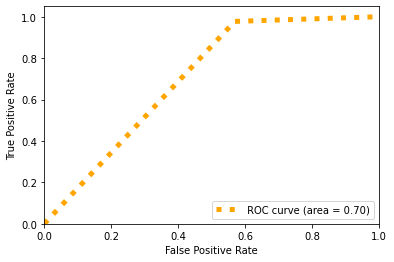

In [32]:
plt.figure()
plt.plot(fpr, tpr,label=' ROC curve (area = {0:0.2f})'
               ''.format(roc_auc),color='orange', linestyle=':', linewidth=5 )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()
